In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy.special import softmax
onehot_encoder = OneHotEncoder(sparse=False)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [2]:
def loss(X, Y, W):
    Z = - np.matmul(X,W)
    N = X.shape[0]
    loss = 1/N * (np.trace(X @ W @ Y.T) + np.sum(np.log(np.sum(np.exp(Z), axis=1))))
    return loss

def gradient(X, Y, W):
    Z = - np.matmul(X,W)
    P = softmax(Z, axis=1)
    N = X.shape[0]
    gd = 1/N * np.matmul(X.T,(Y - P)) 
    return gd

def gradient_descent(X, Y, iteration=1000, lr=0.001):
    Y_onehot = onehot_encoder.fit_transform(Y.reshape(-1,1))
    W = np.zeros((X.shape[1], Y_onehot.shape[1]))
    step = 0
    step_lst = [] 
    loss_lst = []
    W_lst = []
 
    while step < iteration:
        step += 1
        W = W - lr * gradient(X, Y_onehot, W)
        step_lst.append(step)
        W_lst.append(W)
        loss_lst.append(loss(X, Y_onehot, W))

    df = pd.DataFrame({
        'step': step_lst, 
        'loss': loss_lst
    })
    return df, W

In [3]:
class Multiclass:
    def fit(self, X, Y):
        self.loss_steps, self.W = gradient_descent(X, Y)

    def loss_plot(self):
        return self.loss_steps.plot(
            x='step', 
            y='loss',
            xlabel='step',
            ylabel='loss'
        )

    def predict(self, H):
        Z = - np.matmul(H,self.W)
        P = softmax(Z, axis=1)
        return np.argmax(P, axis=1)
    
    def accuracy(self,test_x,test_y):
        predictions = self.predict(np.array(test_x))
        return sum(predictions==np.array(test_y))/len(np.array(test_y))
        

# Contraceptive Method Choice data

In [24]:
data = pd.read_csv("C:/Users/udvas/Downloads/contraceptive.csv")
first_row = np.array(data.columns,dtype="float64")
data.columns = ["Wife's_age", "Wife's_education","Husband's_education",
               "Number_children","Wife's_religion","Wife's_now_working?",
               "Husband's_occupation","Standard-of-living_index",
               "Media_exposure","Contraceptive_method_used"]
y = data.iloc[:,9]
y.replace([1,2,3],[0,1,2],inplace=True)
x = data.iloc[:,range(0,9)]


In [5]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state= 42)

In [6]:
model = Multiclass()
model.fit(np.array(x_train), np.array(y_train))

<AxesSubplot:xlabel='step', ylabel='loss'>

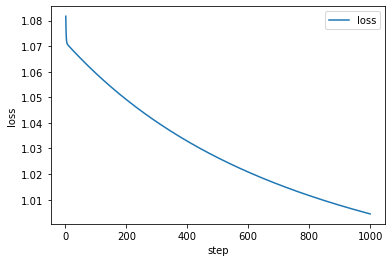

In [7]:
model.loss_plot()

In [8]:
predictions = model.predict(np.array(x_test))

In [9]:
model.accuracy(x_test,y_test)

0.47796610169491527

In [10]:
model.accuracy(x_train,y_train)

0.47578589634664403

## For IRIS dataset

In [16]:
X_iris = load_iris().data
Y_iris = load_iris().target

In [17]:
x_train_iris,x_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, Y_iris, test_size=0.2,random_state= 42)

In [18]:
model.fit(x_train_iris,y_train_iris)

<AxesSubplot:xlabel='step', ylabel='loss'>

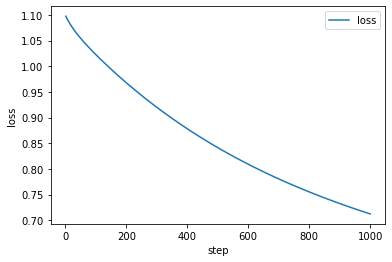

In [20]:
model.loss_plot()

In [21]:
print("Training accuracy on the iris dataset ",model.accuracy(x_test_iris,y_test_iris))

Training accuracy on the iris dataset  0.7


In [22]:
print("Testing accuracy on the iris dataset ",model.accuracy(x_train_iris,y_train_iris))

Testing accuracy on the iris dataset  0.675
